In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import math
import random
import warnings
import matplotlib.cbook
sns.set()
sns.set_style('white')

In [2]:
os.chdir('C:\\Users\\jjs4476\\Documents\\Stochastic Methods for Reservoir Modeling\\Assignments') # Modify the directory
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
df = pd.read_csv('5_sample_data.csv') # Be sure to have 5_sample_data in your files
df.head(10) # A quick view of the data just loaded

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,1,70.0,860.0,1.0,0.118640,3.117596,7035.590426
1,3,70.0,720.0,1.0,0.120775,1.755401,6327.155846
2,5,70.0,580.0,1.0,0.152136,90.385506,5547.976415
3,6,70.0,510.0,1.0,0.148497,81.199756,4025.534147
4,8,70.0,370.0,1.0,0.158123,1497.094898,4385.428975
5,9,70.0,300.0,1.0,0.132016,6292.156474,4912.077977
6,10,70.0,230.0,1.0,0.145744,3713.824769,5151.593694
7,11,70.0,160.0,1.0,0.168037,537.660203,5440.911268
8,12,70.0,90.0,1.0,0.128605,27.417819,5929.812808
9,15,140.0,860.0,1.0,0.093445,7.373822,6439.805211


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 7 columns):
Unnamed: 0    292 non-null int64
X             292 non-null float64
Y             292 non-null float64
Facies        292 non-null float64
Porosity      292 non-null float64
Perm          292 non-null float64
AI            292 non-null float64
dtypes: float64(6), int64(1)
memory usage: 16.0 KB


In [5]:
df = df.rename(columns={'Unnamed: 0': 'Sample_n'}) # Rename one column
df.describe().round(2) # Overall statistics

,Sample_n,X,Y,Facies,Porosity,Perm,AI
count,292.00,292.00,292.00,292.00,292.00,292.00,292.00
mean,281.90,449.33,525.86,0.76,0.12,1037.00,6221.13
std,171.08,278.05,272.45,0.43,0.03,3554.70,1321.14
min,1.00,0.00,19.00,0.00,0.04,0.01,3492.04
25%,125.00,210.00,300.00,1.00,0.10,1.30,5197.95
50%,277.50,420.00,519.00,1.00,0.12,11.45,6145.97
75%,429.25,670.00,790.00,1.00,0.14,201.22,7199.16
max,587.00,990.00,999.00,1.00,0.21,26466.74,9197.48


In [6]:
df_sh = df[df['Facies'] == 0].copy()
df_sd = df[df['Facies'] == 1].copy()

## Declustering

**Specify the area of interest**

In [7]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.04; pormax = 0.22;             # range of porosity values
cmap = plt.cm.plasma                    # color map

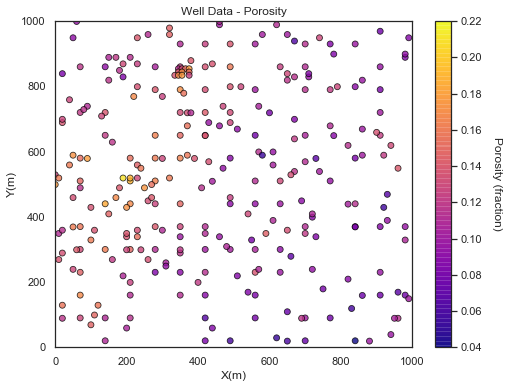

In [8]:
GSLIB.locmap(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,
             'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap,'locmap_Porosity');

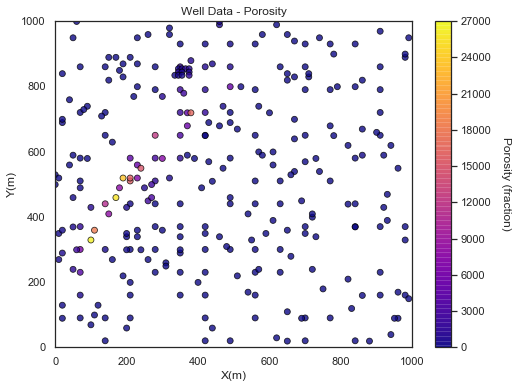

In [9]:
GSLIB.locmap(df,'X','Y','Perm',xmin,xmax,ymin,ymax,0,27000,
             'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap,'locmap_Porosity');

## 1. Declustering

As seen in the maps above, there is preferential sampling (thus, bias). We will use cell declustering.

In [10]:
geostats.declus

<function geostatspy.geostats.declus(df, xcol, ycol, vcol, iminmax, noff, ncell, cmin, cmax)>

We can now populate the parameters. We will run a very wide range of cell sizes, from 10m to 2,000m ('cmin' and 'cmax') and take the cell size that minimizes the declustered mean ('iminmax' = 1 minimize, and = 0 maximize). Multiple offsets (number of these is 'noff') uses multiple grid origins and averages the results to remove sensitivity to grid position. The ncell is the number of cell sizes.

The output from this program is:

- wts - an array with the weigths for each data (they sum to the number of data, 1 indicates nominal weight)
- cell_sizes - an array with the considered cell sizes
- dmeans - de an

[Pyrcz, M.](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_declustering.ipynb)

### Porosity

**All facies**

**By facies: Shale**

In [11]:
wts_sh_por, cell_sizes, dmeans = geostats.declus(df_sh,'X','Y','Porosity', iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sh['Wts_por'] = wts_sh_por                            # add weights to the sample data DataFrame
df_sh.head()                                  # preview to check the sample data DataFrame

There are 70 data with:
   mean of      0.0889172125656666 
   min and max  0.035663300479847906 and 0.13735560945255548
   standard dev 0.01885916142960223 


,Sample_n,X,Y,Facies,Porosity,Perm,AI,Wts_por
50,82,420.0,90.0,0.0,0.065979,0.574035,6988.275096,1.176085
51,83,420.0,20.0,0.0,0.082750,0.483293,7092.007633,1.055395
58,97,490.0,20.0,0.0,0.058288,1.013465,7689.998359,1.176085
61,102,560.0,650.0,0.0,0.078260,0.242697,6762.697531,1.176085
65,108,560.0,230.0,0.0,0.137356,9.531058,7658.708167,0.708732


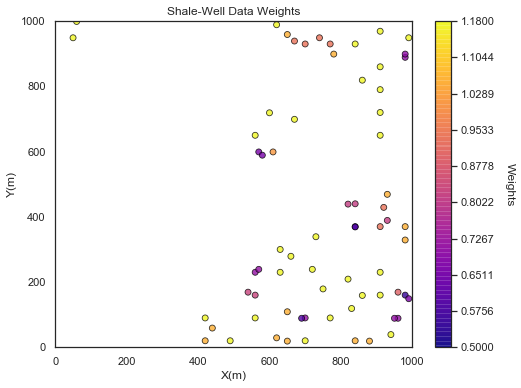

In [12]:
GSLIB.locmap(df_sh,'X','Y','Wts_por',xmin, xmax, ymin,ymax,0.5, 1.18,'Shale-Well Data Weights',
             'X(m)','Y(m)','Weights',cmap,'locmap_Weights');

**By facies: Sand**

In [13]:
wts_sd_por, cell_sizes, dmeans = geostats.declus(df_sd,'X','Y','Porosity', iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sd['Wts_por'] = wts_sd_por                            # add weights to the sample data DataFrame
df_sd.head()                                  # preview to check the sample data DataFrame

There are 222 data with:
   mean of      0.12802140519452038 
   min and max  0.06814023576213735 and 0.21043095902731312
   standard dev 0.02487059041559043 


,Sample_n,X,Y,Facies,Porosity,Perm,AI,Wts_por
0,1,70.0,860.0,1.0,0.118640,3.117596,7035.590426,2.720134
1,3,70.0,720.0,1.0,0.120775,1.755401,6327.155846,0.962857
2,5,70.0,580.0,1.0,0.152136,90.385506,5547.976415,0.831043
3,6,70.0,510.0,1.0,0.148497,81.199756,4025.534147,0.728515
4,8,70.0,370.0,1.0,0.158123,1497.094898,4385.428975,0.644674


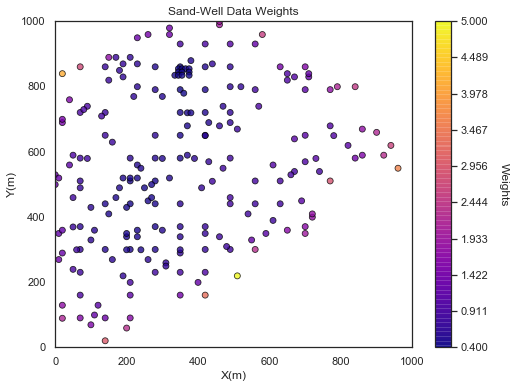

In [14]:
GSLIB.locmap(df_sd,'X','Y','Wts_por',xmin, xmax, ymin,ymax,0.40, 5.0,'Sand-Well Data Weights',
             'X(m)','Y(m)','Weights',cmap,'locmap_Weights');

### Permeability

**Shale**

In [15]:
wts_sh_perm, cell_sizes, dmeans = geostats.declus(df_sh,'X','Y','Perm', iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sh['Wts_perm'] = wts_sh_perm                    # add weights to the sample data DataFrame
df_sh.head()                                  # preview to check the sample data DataFrame

There are 70 data with:
   mean of      4.93013936773676 
   min and max  0.07393847522043212 and 32.98937195588738
   standard dev 6.947693057845101 


,Sample_n,X,Y,Facies,Porosity,Perm,AI,Wts_por,Wts_perm
50,82,420.0,90.0,0.0,0.065979,0.574035,6988.275096,1.176085,1.575909
51,83,420.0,20.0,0.0,0.082750,0.483293,7092.007633,1.055395,1.575909
58,97,490.0,20.0,0.0,0.058288,1.013465,7689.998359,1.176085,1.037447
61,102,560.0,650.0,0.0,0.078260,0.242697,6762.697531,1.176085,0.803802
65,108,560.0,230.0,0.0,0.137356,9.531058,7658.708167,0.708732,0.658120


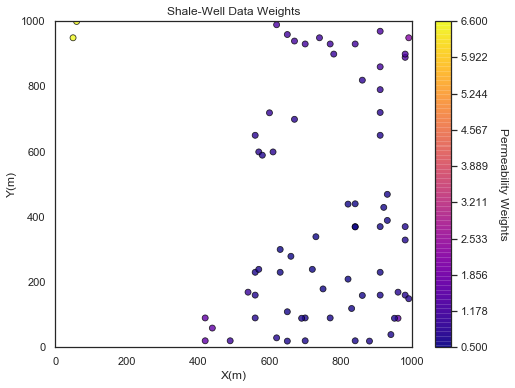

In [16]:
GSLIB.locmap(df_sh,'X','Y','Wts_perm',xmin,xmax,ymin,ymax,0.5, 6.60,'Shale-Well Data Weights',
             'X(m)','Y(m)','Permeability Weights',cmap,'locmap_Weights');

**Sand** 

In [17]:
wts_sd_perm, cell_sizes, dmeans = geostats.declus(df_sd,'X','Y','Perm', iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sd['Wts_perm'] = wts_sd_perm                            # add weights to the sample data DataFrame
df_sd.head()                                  # preview to check the sample data DataFrame

There are 222 data with:
   mean of      1362.4339964839542 
   min and max  0.007068786899201511 and 26466.74498472157
   standard dev 4015.159138734102 


,Sample_n,X,Y,Facies,Porosity,Perm,AI,Wts_por,Wts_perm
0,1,70.0,860.0,1.0,0.118640,3.117596,7035.590426,2.720134,1.407018
1,3,70.0,720.0,1.0,0.120775,1.755401,6327.155846,0.962857,1.048144
2,5,70.0,580.0,1.0,0.152136,90.385506,5547.976415,0.831043,0.656219
3,6,70.0,510.0,1.0,0.148497,81.199756,4025.534147,0.728515,0.658306
4,8,70.0,370.0,1.0,0.158123,1497.094898,4385.428975,0.644674,0.706312


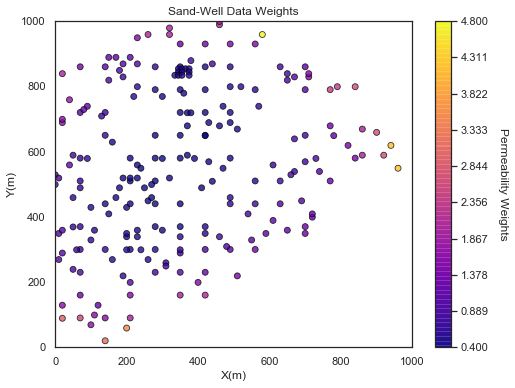

In [18]:
GSLIB.locmap(df_sd,'X','Y','Wts_perm',xmin,xmax,ymin,ymax,0.4, 4.8,'Sand-Well Data Weights',
             'X(m)','Y(m)','Permeability Weights',cmap,'locmap_Weights');

## Confidence intervals

Let's first demonstrate the calculation of the confidence interval for the sample mean at a 95% confidence level. This could be interpreted as the interval over which there is a 95% confidence that it contains the true population. We use the student's t distribution as we assume we do not know the variance and the sample size is small.

\begin{equation}
x̅ \pm t_{\frac{\alpha}{2},n-1} \times \frac {s}{\sqrt{n}} 
\end{equation}

**Porosity**

In [19]:
CI_95_sand_por = stats.t.interval(0.95, len(df_sd) - 1, loc=df_sd['Porosity'].mean(),
                                  scale=stats.sem(df_sd['Porosity']))

# loc: the mean of the set
# stats.sem = the standard error of the mean

print('The confidence interval for the Sand-Porosity interval is ' + str(CI_95_sand_por))

The confidence interval for the Sand-Porosity interval is (0.12472437537141351, 0.1313184350176272)


In [20]:
CI_95_shale_por = stats.t.interval(0.95, len(df_sh) - 1, loc=df_sh['Porosity'].mean(),
                                  scale=stats.sem(df_sh['Porosity']))

# loc: the mean of the set
# stats.sem = the standard error of the mean

print('The confidence interval for the Shale-Porosity interval is ' + str(CI_95_shale_por))

The confidence interval for the Shale-Porosity interval is (0.08438793590180328, 0.0934464892295299)


**Permeability**

In [21]:
CI_95_sand_perm = stats.t.interval(0.95, len(df_sd) - 1, loc=df_sd['Perm'].mean(),
                                  scale=stats.sem(df_sd['Perm']))

# loc: the mean of the set
# stats.sem = the standard error of the mean

print('The confidence interval for the Sand-Permeability interval is (md): ' + str(CI_95_sand_perm))

The confidence interval for the Sand-Permeability interval is (md): (830.1547379815978, 1894.71325498631)


In [22]:
CI_95_shale_perm = stats.t.interval(0.95, len(df_sh) - 1, loc=df_sh['Perm'].mean(),
                                  scale=stats.sem(df_sh['Perm']))

# loc: the mean of the set
# stats.sem = the standard error of the mean

print('The confidence interval for the Shale-Permeability interval is (md): ' + str(CI_95_shale_perm))

The confidence interval for the Shale-Permeability interval is (md): (3.261559131439016, 6.598719604034503)


## Hypothesis testing : means

**Equal variances**

Now, let's try the t test, hypothesis test for difference in means. This test assumes that the variances are similar along with the data being Gaussian distributed.  This is our test:

\begin{equation}
H_0: \mu_{X1} = \mu_{X2}
\end{equation}

\begin{equation}
H_1: \mu_{X1} \ne \mu_{X2}
\end{equation}

For the resulting t-statistic and p-value we run this command.

- **Porosity: sand vs shale**

In [23]:
t_pooled, p_pooled = stats.ttest_ind(df_sd['Porosity'], df_sh['Porosity'])
print('The t statistic is ' + str(t_pooled) + ' and the p-value is ' + str(p_pooled))

The t statistic is 12.061802082449463 and the p-value is 2.003652445308119e-27


We reject the null hypothesis, and accept the alternative hypothesis: the porosity means of sand and shale are different. We conclude this because the p value is zero, and smaller than the significance level $\alpha$.

- **Permeability: sand vs shale**

In [24]:
t_pooled, p_pooled = stats.ttest_ind(df_sd['Perm'], df_sh['Perm'])
print('The t statistic is ' + str(t_pooled) + ' and the p-value is ' + str(p_pooled))

The t statistic is 2.818997543790197 and the p-value is 0.005149023707977389


We reject the null hypothesis, and accept the alternative hypothesis: the permeability means of the two facies are different. We conclude this because the p value is zero, and smaller than the significance level $\alpha$.

- **Unequal variances (Welch's test)**

In [25]:
stats.ttest_ind(df_sd['Porosity'], df_sh['Porosity'], equal_var=False)

Ttest_indResult(statistic=13.865810768086808, pvalue=1.1003484619200338e-28)

In [26]:
stats.ttest_ind(df_sd['Perm'], df_sh['Perm'], equal_var=False)

Ttest_indResult(statistic=5.026114333529673, pvalue=1.032872475378345e-06)

Again, we reject the null hypotheses for porosity and permeability.

## Hypothesis testing: variances

\begin{equation}
H_0: \sigma^{2}_{X2} \le \sigma^{2}_{X1}
\end{equation}

\begin{equation}
H_1: \sigma^{2}_{X2} \gt \sigma^{2}_{X1}
\end{equation}

Note, by ordering the variances we eliminate the case of $\sigma^{2}_{X2} \lt \sigma^{2}_{X1}$.

Testing for normality in the distributions of sand and shale.

In [27]:
stats.anderson(df_sh['Porosity'], dist='norm')

AndersonResult(statistic=0.2670770392259243, critical_values=array([0.548, 0.624, 0.748, 0.873, 1.038]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [28]:
stats.anderson(df_sd['Porosity'], dist='norm')

AndersonResult(statistic=0.7457859963462283, critical_values=array([0.566, 0.645, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Porosity in both distributions (sand and shale) are normally distributed, at a 5% significance level.

In [29]:
stats.anderson(df_sh['Perm'], dist='norm')

AndersonResult(statistic=7.207062495635327, critical_values=array([0.548, 0.624, 0.748, 0.873, 1.038]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [30]:
stats.anderson(df_sd['Perm'], dist='norm')

AndersonResult(statistic=53.59116481180513, critical_values=array([0.566, 0.645, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Permeability in both facies are **not** normally distributed. We will use Levene's test for permeability to check variances.

**Porosity**

In [31]:
p_value = 1 - stats.f.cdf(df_sd['Porosity'].var()/df_sh['Porosity'].var(),
                          dfn=len(df_sd['Porosity'])-1, dfd=len(df_sh['Porosity'])-1)
p_value

0.004514993824717761

We reject the null hypothesis, because $p < \alpha$.

**Permeability**

In [32]:
stats.levene(df_sd['Perm'], df_sh['Perm'])

LeveneResult(statistic=7.906106472363167, pvalue=0.005262789689082583)

We reject the null hypothesis, because $p < \alpha$.

## 2. Heterogeneity measures

Declustering heterogeneity measures are feasible but they do not offer additional insight than computing the measures using the raw data. However, we can compute the variance and the coefficient of variation using the weights.

### Coefficient of variation


$C_v = \frac{\sigma}{\mu}$


- Porosity

### Dykstra - Parsons' and Koval's heterogeneity factor Hk

$V_{dp} = \frac{k_{50} - k_{16}}{k_{50}}$


$H_k = \frac{V_{dp}}{(1 - V_{dp})^{0.2}}  $

### Lorenz Coefficient

In [33]:
def heterogeneity(DataFrame, weights):
    if isinstance(weights, (list, tuple, np.ndarray)):
    
        #Coefficient of variation:
        #Return the weighted average and standard deviation.
        #values, weights -- Numpy ndarrays with the same shape.
        CV = math.sqrt(DataFrame['Perm'].var()) / DataFrame['Perm'].mean()

        average = np.average(DataFrame['Perm'], weights=weights)
        variance = np.average((DataFrame['Perm'] - average) ** 2, weights=weights)
        CV_weights = math.sqrt(variance) / average

        # Dykstra Parsons
        mu = np.log(((DataFrame["Perm"].mean())**2) / np.sqrt(DataFrame["Perm"].var() +
                                                                (DataFrame["Perm"].mean())**2) ** 2)
        sigma = np.sqrt(np.log((DataFrame["Perm"].var()/ ((DataFrame["Perm"].mean())**2))) + 1)
        k50 = stats.lognorm(sigma, scale=np.exp(mu)).ppf(0.5)
        k16 = stats.lognorm(sigma, scale=np.exp(mu)).ppf(0.16)
        Vdp = 1 - (k16 / k50)

        # Koval's heterogeneity factor
        Hk = 10 ** (Vdp / (1 - Vdp)**0.2)

        # Lorenz Coefficient
        DataFrame['k_phi'] = DataFrame['Perm'] / DataFrame['Porosity']
        DataFrame.sort_values(by=['k_phi'], ascending=False, inplace=True) # inplace=False to avoid having sorted
        DataFrame['C'] = np.cumsum(DataFrame['Porosity'] / np.sum(DataFrame['Porosity']))
        DataFrame['F'] = np.cumsum(DataFrame['Perm'] / np.sum(DataFrame['Perm']))
        Lorenz = (scipy.integrate.simps(DataFrame['F'], DataFrame['C']) - 0.5) * 2
    
        return CV, CV_weights, Vdp, Lorenz, Hk

    else:
        #Coefficient of variation:
        #Return the weighted average and standard deviation.
        #values, weights -- Numpy ndarrays with the same shape.
        CV = math.sqrt(DataFrame['Perm'].var()) / DataFrame['Perm'].mean()

        # Dykstra Parsons
        mu = np.log(((DataFrame["Perm"].mean())**2) / np.sqrt(DataFrame["Perm"].var() +
                                                                (DataFrame["Perm"].mean())**2) ** 2)
        sigma = np.sqrt(np.log((DataFrame["Perm"].var()/ ((DataFrame["Perm"].mean())**2))) + 1)
        k50 = stats.lognorm(sigma, scale=np.exp(mu)).ppf(0.5)
        k16 = stats.lognorm(sigma, scale=np.exp(mu)).ppf(0.16)
        Vdp = 1 - (k16 / k50)

        # Koval's heterogeneity factor
        Hk = 10 ** (Vdp / (1 - Vdp)**0.2)

        # Lorenz Coefficient
        DataFrame['k_phi'] = DataFrame['Perm'] / DataFrame['Porosity']
        DataFrame.sort_values(by=['k_phi'], ascending=False, inplace=True) # inplace=False to avoid having sorted
        DataFrame['C'] = np.cumsum(DataFrame['Porosity'] / np.sum(DataFrame['Porosity']))
        DataFrame['F'] = np.cumsum(DataFrame['Perm'] / np.sum(DataFrame['Perm']))
        Lorenz = (scipy.integrate.simps(DataFrame['F'], DataFrame['C']) - 0.5) * 2
    
        return CV, Vdp, Lorenz, Hk

In [34]:
heterogeneity(df_sh, wts_sh_perm)
# SHALE
#Coefficient of variation, no weights
#Coefficient of variation, with weights from declustering
#Dykstra Parsons coefficient
#Lorenz coefficient
#Koval's heterogeneity factor

(1.4194035981776598,
 1.4845333370833615,
 0.7265933493730794,
 0.6424894030736026,
 8.744539306164853)

In [35]:
heterogeneity(df_sd, wts_sd_perm)
# SAND
#Coefficient of variation, no weights
#Coefficient of variation, with weights from declustering
#Dykstra Parsons coefficient
#Lorenz coefficient
#Koval's heterogeneity factor

(2.953708558840176,
 4.088139180467016,
 0.8295816302453609,
 0.8555912673127946,
 15.199603999064186)

In [36]:
heterogeneity(df, 0)
# BOTH FACIES
#Coefficient of variation, no weights
#Dykstra Parsons coefficient
#Lorenz coefficient
#Koval's heterogeneity factor

(3.427854977564046, 0.8428937004464716, 0.8802645685786956, 16.61458945221209)

## 4. Ten additional wells on the uncertainty model

In [37]:
GSLIB.hist_st

<function geostatspy.GSLIB.hist_st(array, xmin, xmax, log, cumul, bins, weights, xlabel, title)>

In [46]:
def bootstrap(DataFrame1, DataFrame2, weights1, weights2, L):
    if DataFrame1.mean() < 1:
        mean_1 = np.zeros(L); stdev_1 = np.zeros(L)
        p90_1 = np.zeros(L); p10_1 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame1.values, weights=weights1, cum_weights=None, k=len(DataFrame1))
            mean_1[l] = np.average(samples)
            stdev_1[l] = np.std(samples)
            p90_1[l] = np.percentile(samples, 90)
            p10_1[l] = np.percentile(samples, 10)

        mean_2 = np.zeros(L); stdev_2 = np.zeros(L)
        p90_2 = np.zeros(L); p10_2 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame2.values, weights=weights2, cum_weights=None, k=len(DataFrame2))
            mean_2[l] = np.average(samples)
            stdev_2[l] = np.std(samples)
            p90_2[l] = np.percentile(samples, 90)
            p10_2[l] = np.percentile(samples, 10)

        fig = plt.figure()
        ax1 = fig.add_subplot(421)
        ax2 = fig.add_subplot(422)
        ax3 = fig.add_subplot(423)
        ax4 = fig.add_subplot(424)

        plt.subplot(421)
        ax1.hist(mean_1, label='Sand', bins=30, alpha=0.6,)
        ax1.hist(mean_2, label='Shale', bins=30, alpha=0.6)
        ax1.set(xlabel='Average Porosity(fraction)', ylabel='Density', title='Bootstrap Uncertainty in Porosity Average')
        ax1.legend();

        plt.subplot(422)
        ax2.hist(stdev_1, label='Sand', bins=30, alpha=0.6,)
        ax2.hist(stdev_2, label='Shale', bins=30, alpha=0.6)
        ax2.set(xlabel='Standard Deviation Porosity (fraction)', ylabel='Density',
                title='Bootstrap Uncertainty in Porosity Standard Deviation')
        ax2.legend();

        plt.subplot(423)
        ax3.hist(p10_1, label='Sand', bins=30, alpha=0.6,)
        ax3.hist(p10_2, label='Shale', bins=30, alpha=0.6)
        ax3.set(xlabel='P10 Porosity (fraction)', ylabel='Density', title='Bootstrap Uncertainty in Porosity P10')
        ax3.legend();

        plt.subplot(424)
        ax4.hist(p90_1, label='Sand', bins=30, alpha=0.6,)
        ax4.hist(p90_2, label='Shale', bins=30, alpha=0.6)
        ax4.set(xlabel='P90 Porosity (fraction)', ylabel='Density', title='Bootstrap Uncertainty in Porosity P90')
        ax4.legend();

        fig.subplots_adjust(left=0.1, bottom=0.1, right=2, top=5, wspace=0.2, hspace=0.3);
        
    else:
        mean_1 = np.zeros(L); stdev_1 = np.zeros(L)
        p90_1 = np.zeros(L); p10_1 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame1.values, weights=weights1, cum_weights=None, k=len(DataFrame1))
            mean_1[l] = np.average(samples)
            stdev_1[l] = np.std(samples)
            p90_1[l] = np.percentile(samples, 90)
            p10_1[l] = np.percentile(samples, 10)

        mean_2 = np.zeros(L); stdev_2 = np.zeros(L)
        p90_2 = np.zeros(L); p10_2 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame2.values, weights=weights2, cum_weights=None, k=len(DataFrame2))
            mean_2[l] = np.average(samples)
            stdev_2[l] = np.std(samples)
            p90_2[l] = np.percentile(samples, 90)
            p10_2[l] = np.percentile(samples, 10)

        fig = plt.figure()
        ax1 = fig.add_subplot(421)
        ax2 = fig.add_subplot(422)
        ax3 = fig.add_subplot(423)
        ax4 = fig.add_subplot(424)

        plt.subplot(421)
        ax1.hist(np.log10(mean_1), label='Sand', bins=30, alpha=0.6,)
        ax1.hist(np.log10(mean_2), label='Shale', bins=30, alpha=0.6)
        ax1.set(xlabel='Average Permeability (md)', ylabel='Density', title='Bootstrap Uncertainty in Permeability Average')
        ax1.legend();

        plt.subplot(422)
        ax2.hist(np.log10(stdev_1), label='Sand', bins=30, alpha=0.6,)
        ax2.hist(np.log10(stdev_2), label='Shale', bins=30, alpha=0.6)
        ax2.set(xlabel='Standard Deviation Permeability (md)', ylabel='Density',
                title='Bootstrap Uncertainty in Permeability Standard Deviation')
        ax2.legend();

        plt.subplot(423)
        ax3.hist(p10_1, label='Sand', bins=30, alpha=0.6,)
        ax3.hist(p10_2, label='Shale', bins=30, alpha=0.6)
        ax3.set(xlabel='P10 Permeability (md)', ylabel='Density', title='Bootstrap Uncertainty in Permeability P10')
        ax3.legend();

        plt.subplot(424)
        ax4.hist(p90_1, label='Sand', bins=30, alpha=0.6,)
        ax4.hist(p90_2, label='Shale', bins=30, alpha=0.6)
        ax4.set(xlabel='P90 Permeability (md)', ylabel='Density', title='Bootstrap Uncertainty in Permeability P90')
        ax4.legend();

        fig.subplots_adjust(left=0.1, bottom=0.1, right=2, top=5, wspace=0.2, hspace=0.3);

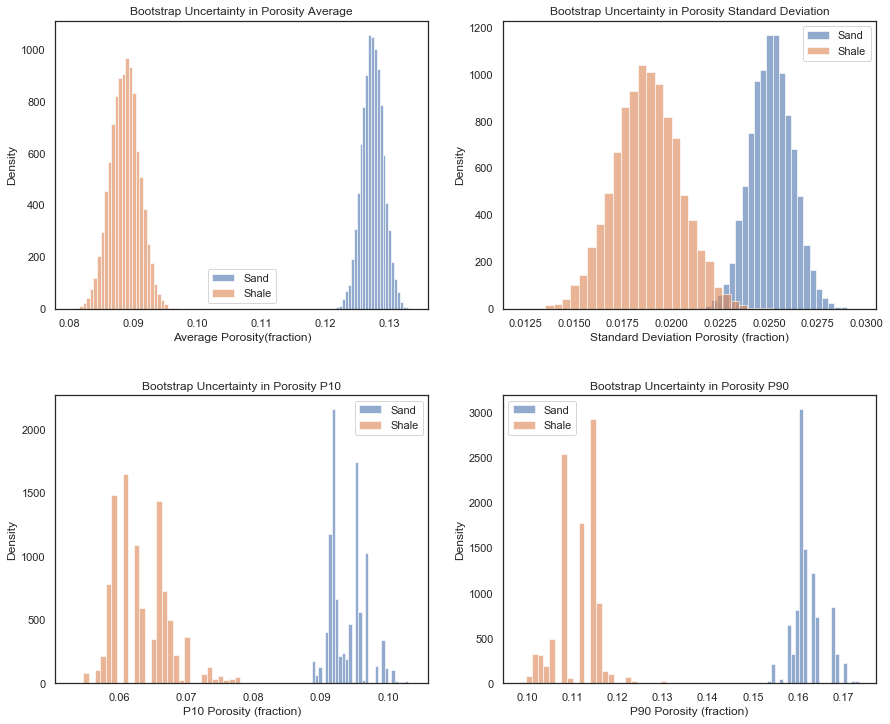

In [49]:
# Porosity bootstrap by facies
bootstrap(df_sd['Porosity'], df_sh['Porosity'], wts_sd_por, wts_sh_por, 10000)

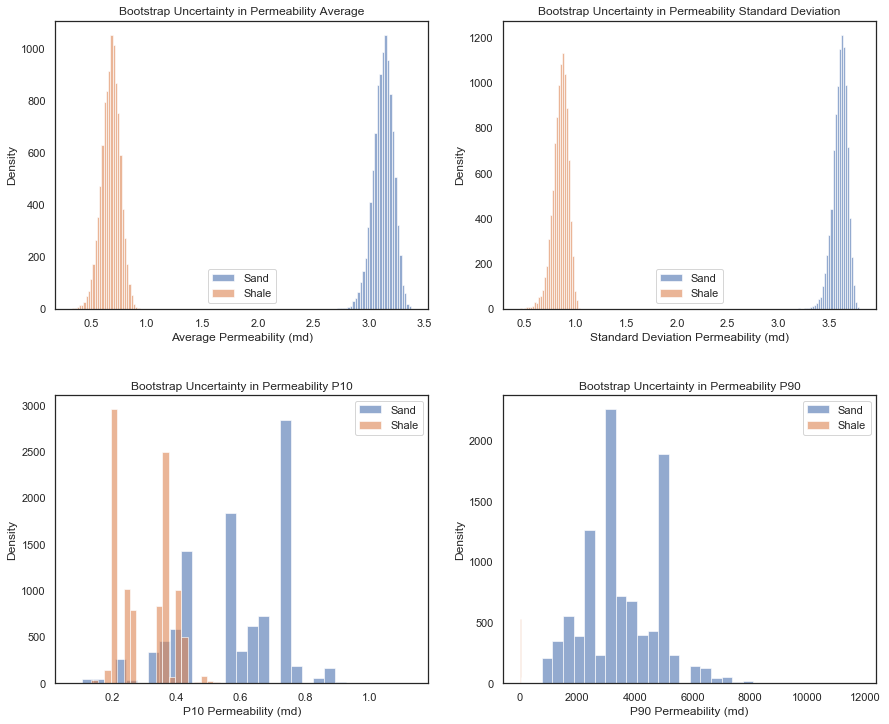

In [50]:
# Permeability bootstrap by facies
bootstrap(df_sd['Perm'], df_sh['Perm'], wts_sd_perm, wts_sh_perm, 10000)

In [69]:
def bootstrap_por10(DataFrame, weights, L):
    if DataFrame.mean() > 0.12: # if the porosity is larger than 0.12 , it is a sand
        mean_1 = np.zeros(L); stdev_1 = np.zeros(L)
        p90_1 = np.zeros(L); p10_1 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame.values, weights=weights, cum_weights=None, k=len(DataFrame))
            mean_1[l] = np.average(samples)
            stdev_1[l] = np.std(samples)
            p90_1[l] = np.percentile(samples, 90)
            p10_1[l] = np.percentile(samples, 10)

        mean_2 = np.zeros(L); stdev_2 = np.zeros(L)
        p90_2 = np.zeros(L); p10_2 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame.values, weights=weights, cum_weights=None, k=len(DataFrame + 10))
            mean_2[l] = np.average(samples)
            stdev_2[l] = np.std(samples)
            p90_2[l] = np.percentile(samples, 90)
            p10_2[l] = np.percentile(samples, 10)

        fig = plt.figure()
        ax1 = fig.add_subplot(421)
        ax2 = fig.add_subplot(422)
        ax3 = fig.add_subplot(423)
        ax4 = fig.add_subplot(424)

        plt.subplot(421)
        ax1.hist(mean_1, label='n wells', bins=30, alpha=0.6,)
        ax1.hist(mean_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax1.set(xlabel='Average Porosity(fraction)', ylabel='Density',
                title='Sand Bootstrap Uncertainty Porosity Average Comparison')
        ax1.legend();

        plt.subplot(422)
        ax2.hist(stdev_1, label='n wells', bins=30, alpha=0.6,)
        ax2.hist(stdev_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax2.set(xlabel='Standard Deviation Porosity (fraction)', ylabel='Density',
                title='Sand Bootstrap Uncertainty in Porosity Standard Deviation Comparison')
        ax2.legend();

        plt.subplot(423)
        ax3.hist(p10_1, label='n wells', bins=30, alpha=0.6,)
        ax3.hist(p10_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax3.set(xlabel='P10 Porosity (fraction)', ylabel='Density',
                title='Sand Bootstrap Uncertainty in Porosity P10 Comparison')
        ax3.legend();

        plt.subplot(424)
        ax4.hist(p90_1, label='n wells', bins=30, alpha=0.6,)
        ax4.hist(p90_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax4.set(xlabel='P90 Porosity (fraction)', ylabel='Density',
                title='Sand Bootstrap Uncertainty in Porosity P90 Comparison')
        ax4.legend();

        fig.subplots_adjust(left=0.1, bottom=0.1, right=2, top=5, wspace=0.2, hspace=0.3);
        

        fig.subplots_adjust(left=0.1, bottom=0.1, right=2, top=5, wspace=0.2, hspace=0.3);
        
    else: # shale analysis
        mean_1 = np.zeros(L); stdev_1 = np.zeros(L)
        p90_1 = np.zeros(L); p10_1 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame.values, weights=weights, cum_weights=None, k=len(DataFrame))
            mean_1[l] = np.average(samples)
            stdev_1[l] = np.std(samples)
            p90_1[l] = np.percentile(samples, 90)
            p10_1[l] = np.percentile(samples, 10)

        mean_2 = np.zeros(L); stdev_2 = np.zeros(L)
        p90_2 = np.zeros(L); p10_2 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame.values, weights=weights, cum_weights=None, k=len(DataFrame + 10))
            mean_2[l] = np.average(samples)
            stdev_2[l] = np.std(samples)
            p90_2[l] = np.percentile(samples, 90)
            p10_2[l] = np.percentile(samples, 10)

        fig = plt.figure()
        ax1 = fig.add_subplot(421)
        ax2 = fig.add_subplot(422)
        ax3 = fig.add_subplot(423)
        ax4 = fig.add_subplot(424)

        plt.subplot(421)
        ax1.hist(mean_1, label='n wells', bins=30, alpha=0.4,)
        ax1.hist(mean_2, label='n + 10 wells', bins=30, alpha=0.4)
        ax1.set(xlabel='Average Porosity(fraction)', ylabel='Density',
                title='Shale Bootstrap Uncertainty Porosity Average Comparison')
        ax1.legend();

        plt.subplot(422)
        ax2.hist(stdev_1, label='n wells', bins=30, alpha=0.4,)
        ax2.hist(stdev_2, label='n + 10 wells', bins=30, alpha=0.4)
        ax2.set(xlabel='Standard Deviation Porosity (fraction)', ylabel='Density',
                title='Shale Bootstrap Uncertainty in Porosity Standard Deviation Comparison')
        ax2.legend();

        plt.subplot(423)
        ax3.hist(p10_1, label='n wells', bins=30, alpha=0.4,)
        ax3.hist(p10_2, label='n + 10 wells', bins=30, alpha=0.4)
        ax3.set(xlabel='P10 Porosity (fraction)', ylabel='Density',
                title='Shale Bootstrap Uncertainty in Porosity P10 Comparison')
        ax3.legend();

        plt.subplot(424)
        ax4.hist(p90_1, label='n wells', bins=30, alpha=0.4,)
        ax4.hist(p90_2, label='n + 10 wells', bins=30, alpha=0.4)
        ax4.set(xlabel='P90 Porosity (fraction)', ylabel='Density',
                title='Shale Bootstrap Uncertainty in Porosity P90 Comparison')
        ax4.legend();

        fig.subplots_adjust(left=0.1, bottom=0.1, right=2, top=5, wspace=0.2, hspace=0.3);
        

        fig.subplots_adjust(left=0.1, bottom=0.1, right=2, top=5, wspace=0.2, hspace=0.3);

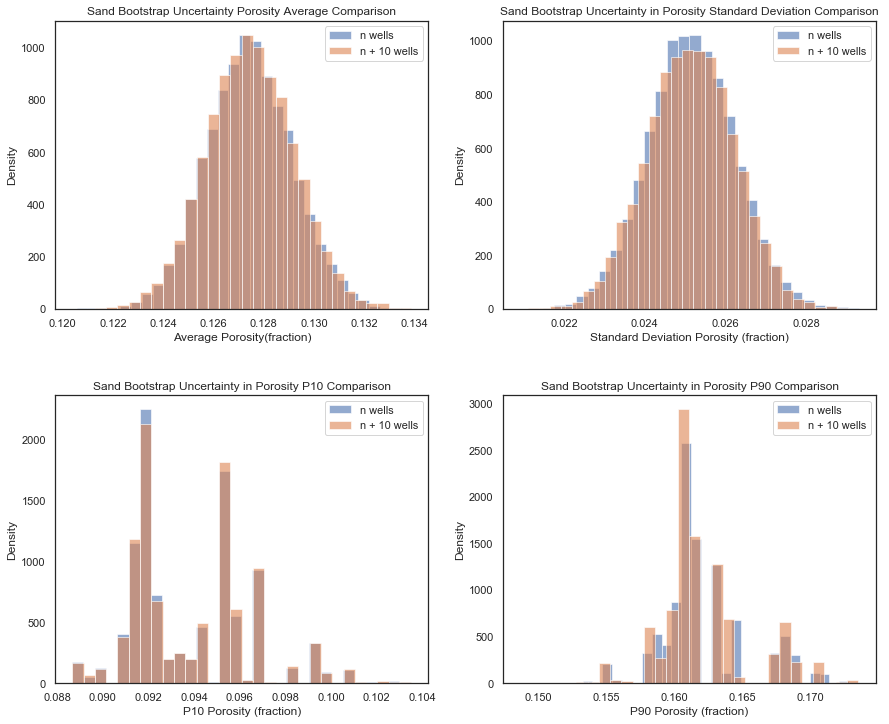

In [71]:
bootstrap_por10(df_sd['Porosity'], wts_sd_por, 10000)

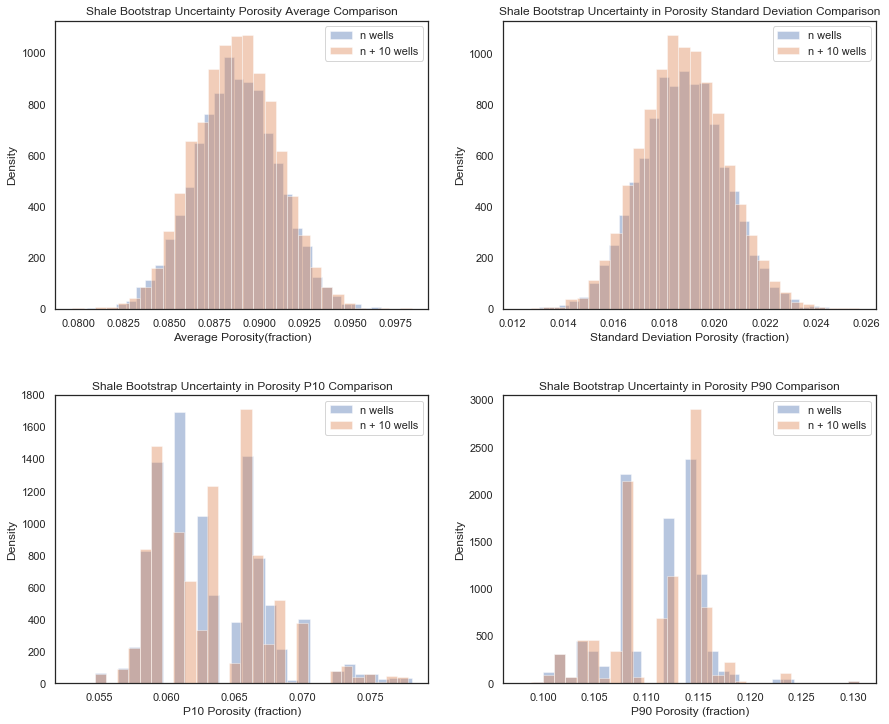

In [72]:
bootstrap_por10(df_sh['Porosity'], wts_sh_por, 10000)

In [73]:
def bootstrap_k10(DataFrame, weights, L):
    if DataFrame.mean() > 50: # if the permeability is larger than 50 md , it is a sand
        mean_1 = np.zeros(L); stdev_1 = np.zeros(L)
        p90_1 = np.zeros(L); p10_1 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame.values, weights=weights, cum_weights=None, k=len(DataFrame))
            mean_1[l] = np.average(samples)
            stdev_1[l] = np.std(samples)
            p90_1[l] = np.percentile(samples, 90)
            p10_1[l] = np.percentile(samples, 10)

        mean_2 = np.zeros(L); stdev_2 = np.zeros(L)
        p90_2 = np.zeros(L); p10_2 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame.values, weights=weights, cum_weights=None, k=len(DataFrame + 10))
            mean_2[l] = np.average(samples)
            stdev_2[l] = np.std(samples)
            p90_2[l] = np.percentile(samples, 90)
            p10_2[l] = np.percentile(samples, 10)

        fig = plt.figure()
        ax1 = fig.add_subplot(421)
        ax2 = fig.add_subplot(422)
        ax3 = fig.add_subplot(423)
        ax4 = fig.add_subplot(424)

        plt.subplot(421)
        ax1.hist(mean_1, label='n wells', bins=30, alpha=0.6,)
        ax1.hist(mean_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax1.set(xlabel='Average Permeability (md)', ylabel='Density',
                title='Sand Bootstrap Uncertainty Permeability Average Comparison')
        ax1.legend();

        plt.subplot(422)
        ax2.hist(stdev_1, label='n wells', bins=30, alpha=0.6,)
        ax2.hist(stdev_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax2.set(xlabel='Standard Deviation Permeability (md)', ylabel='Density',
                title='Sand Bootstrap Uncertainty in Permeability Standard Deviation Comparison')
        ax2.legend();

        plt.subplot(423)
        ax3.hist(p10_1, label='n wells', bins=30, alpha=0.6,)
        ax3.hist(p10_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax3.set(xlabel='P10 Permeability (md)', ylabel='Density',
                title='Sand Bootstrap Uncertainty in Permeability P10 Comparison')
        ax3.legend();

        plt.subplot(424)
        ax4.hist(p90_1, label='n wells', bins=30, alpha=0.6,)
        ax4.hist(p90_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax4.set(xlabel='P90 Permeability (md)', ylabel='Density',
                title='Sand Bootstrap Uncertainty in Permeability P90 Comparison')
        ax4.legend();

        fig.subplots_adjust(left=0.1, bottom=0.1, right=2, top=5, wspace=0.2, hspace=0.3);
        
    else: # shale analysis
        mean_1 = np.zeros(L); stdev_1 = np.zeros(L)
        p90_1 = np.zeros(L); p10_1 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame.values, weights=weights, cum_weights=None, k=len(DataFrame))
            mean_1[l] = np.average(samples)
            stdev_1[l] = np.std(samples)
            p90_1[l] = np.percentile(samples, 90)
            p10_1[l] = np.percentile(samples, 10)

        mean_2 = np.zeros(L); stdev_2 = np.zeros(L)
        p90_2 = np.zeros(L); p10_2 = np.zeros(L)
        for l in np.arange(0, L):                      # loop over realizations
            samples = random.choices(DataFrame.values, weights=weights, cum_weights=None, k=len(DataFrame + 10))
            mean_2[l] = np.average(samples)
            stdev_2[l] = np.std(samples)
            p90_2[l] = np.percentile(samples, 90)
            p10_2[l] = np.percentile(samples, 10)

        fig = plt.figure()
        ax1 = fig.add_subplot(421)
        ax2 = fig.add_subplot(422)
        ax3 = fig.add_subplot(423)
        ax4 = fig.add_subplot(424)

        plt.subplot(421)
        ax1.hist(mean_1, label='n wells', bins=30, alpha=0.6,)
        ax1.hist(mean_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax1.set(xlabel='Average Permeability (md)', ylabel='Density',
                title='Shale Bootstrap Uncertainty Permeability Average Comparison')
        ax1.legend();

        plt.subplot(422)
        ax2.hist(stdev_1, label='n wells', bins=30, alpha=0.6,)
        ax2.hist(stdev_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax2.set(xlabel='Standard Deviation Permeability (md)', ylabel='Density',
                title='Shale Bootstrap Uncertainty in Permeability Standard Deviation Comparison')
        ax2.legend();

        plt.subplot(423)
        ax3.hist(p10_1, label='n wells', bins=30, alpha=0.6,)
        ax3.hist(p10_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax3.set(xlabel='P10 Permeability (md)', ylabel='Density',
                title='Shale Bootstrap Uncertainty in Permeability P10 Comparison')
        ax3.legend();

        plt.subplot(424)
        ax4.hist(p90_1, label='n wells', bins=30, alpha=0.6,)
        ax4.hist(p90_2, label='n + 10 wells', bins=30, alpha=0.6)
        ax4.set(xlabel='P90 Permeability (md)', ylabel='Density',
                title='Shale Bootstrap Uncertainty in Permeability P90 Comparison')
        ax4.legend();

        fig.subplots_adjust(left=0.1, bottom=0.1, right=2, top=5, wspace=0.2, hspace=0.3);

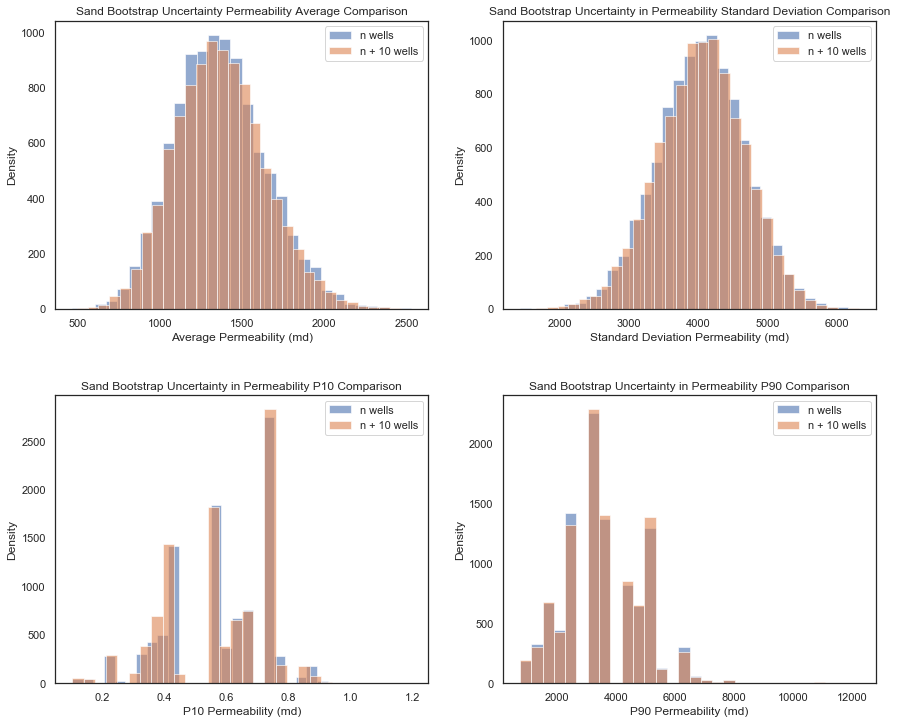

In [77]:
bootstrap_k10(df_sd['Perm'], wts_sd_perm, 10000)

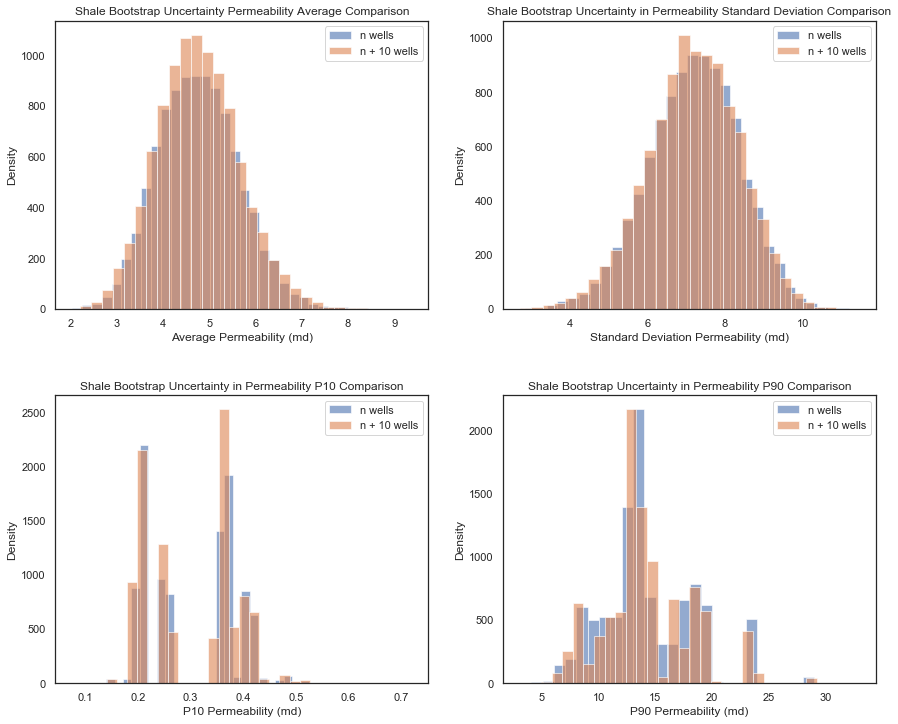

In [78]:
bootstrap_k10(df_sh['Perm'], wts_sh_perm, 10000)

In [79]:
1e6

1000000.0

In [80]:
GSLIB.hist_st

<function geostatspy.GSLIB.hist_st(array, xmin, xmax, log, cumul, bins, weights, xlabel, title)>